In [1]:
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure 
from scipy.stats import linregress
from scipy.optimize import curve_fit
import math

## Question 1 (Heesu) 
### Is there a correlation between yearly global average temperature and yearly average global CO2 level ?
* Heesu's data cleanup

### Findings: 
* From 1959 to 2015, both co2 levels and average global temperature has increased 
* There is a strong positive positive correlation between co2 levels and average global temperatures, therefore, as co2 levels increase, average global temperatures also increase.
* Theres is an outlier of 16.06 degrees recorded in 2015

In [2]:
global_temps = pd.read_csv("data_sets/GlobalTemperatures_kaggle.csv")
global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#finding out data type
np.dtype(global_temps["dt"])

dtype('O')

In [4]:
#removing rows with NaN values
global_temps.dropna(how = "any", inplace = True)
global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [5]:
# retrieving first value in list of values separated by hyphen 
splited_series = global_temps['dt'].str.split('-').str[0]
splited_series

1200    1850
1201    1850
1202    1850
1203    1850
1204    1850
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: dt, Length: 1992, dtype: object

In [6]:
#adding as new series to original dataframe 
global_temps["year"] = splited_series.astype("int64")

In [7]:
#checking if new column is added
global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850


In [8]:
#checking data type
 print(np.dtype(global_temps["year"]))

int64


In [9]:
#getting data from last 50 years; 1966 to 2015 
average_temperatures = global_temps.groupby("year")["LandAndOceanAverageTemperature"].sum()/12
average_temperatures

year
1850    14.867167
1851    14.991833
1852    15.006500
1853    14.955167
1854    14.991000
          ...    
2011    15.769500
2012    15.802333
2013    15.854417
2014    15.913000
2015    16.058583
Name: LandAndOceanAverageTemperature, Length: 166, dtype: float64

In [10]:
#creating dataframe
ave_temps_year = pd.DataFrame(average_temperatures)
ave_temps_year.head()

,LandAndOceanAverageTemperature
year,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000


In [11]:
#reading in excel of year and mean co2 emissions
mean_co2_emission = pd.read_excel("data_sets/global_mean_CO2_emissions_year.xlsx")
mean_co2_emission.head()

,year,yearly mean co2 emission (ppm)
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99


In [12]:
#merging dataframes on year
merged_df = pd.merge(ave_temps_year, mean_co2_emission, on = "year", how = "outer")
#dropping NaN values
merged_df.dropna(how = "any", inplace = True)
merged_df.head()

,year,LandAndOceanAverageTemperature,yearly mean co2 emission (ppm)
109,1959,15.340500,315.98
110,1960,15.291917,316.91
111,1961,15.379917,317.64
112,1962,15.325583,318.45
113,1963,15.376667,318.99


## Scatter plot and Line of regression

### Is there a relationship between Average Global temperature and mean global levels?
* There is a strong positive positive correlation between co2 levels and average global temperatures, therefore, as co2 levels increase, average global temperatures also increase.
* Theres is an outlier of 16.06 degrees recorded in 2015.

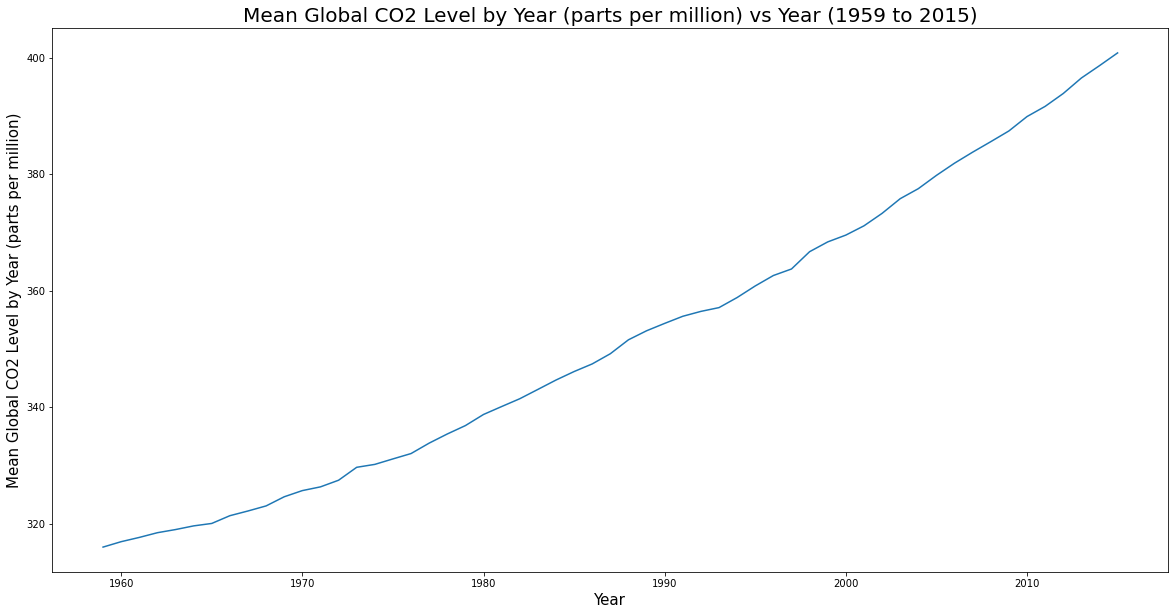

In [13]:
# Is there a relationship between co2 levels/average temp and time?
#mean CO2 emissions vs year
plt.figure(figsize=(20, 10))
plt.xlabel("Year",fontsize=15)
plt.ylabel("Mean Global CO2 Level by Year (parts per million)",fontsize=15)
plt.title("Mean Global CO2 Level by Year (parts per million) vs Year (1959 to 2015)",fontsize=20)
plt.plot(merged_df["year"], merged_df["yearly mean co2 emission (ppm)"])

plt.savefig("boxplot_scatter_gmaps_images/plot_co2_vs_year_heesu.png")

plt.show()

* Mean CO2 levels have increased over time between 1959 to 2015

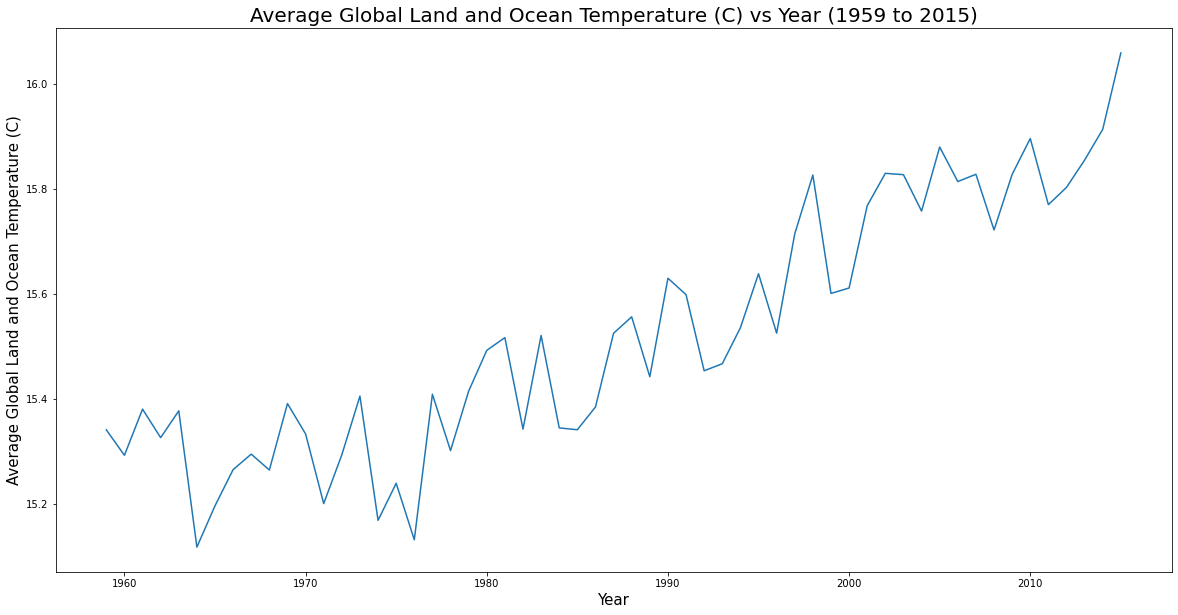

In [14]:
#ave temp vs year
plt.figure(figsize=(20, 10))
plt.xlabel("Year",fontsize=15)
plt.ylabel("Average Global Land and Ocean Temperature (C)",fontsize=15)
plt.title("Average Global Land and Ocean Temperature (C) vs Year (1959 to 2015)",fontsize=20)
plt.plot(merged_df["year"], merged_df["LandAndOceanAverageTemperature"])

plt.savefig("boxplot_scatter_gmaps_images/plot_avetemp_vs_year_heesu.png")

plt.show()

* Average global temperature has increased from 1959 to 2015 

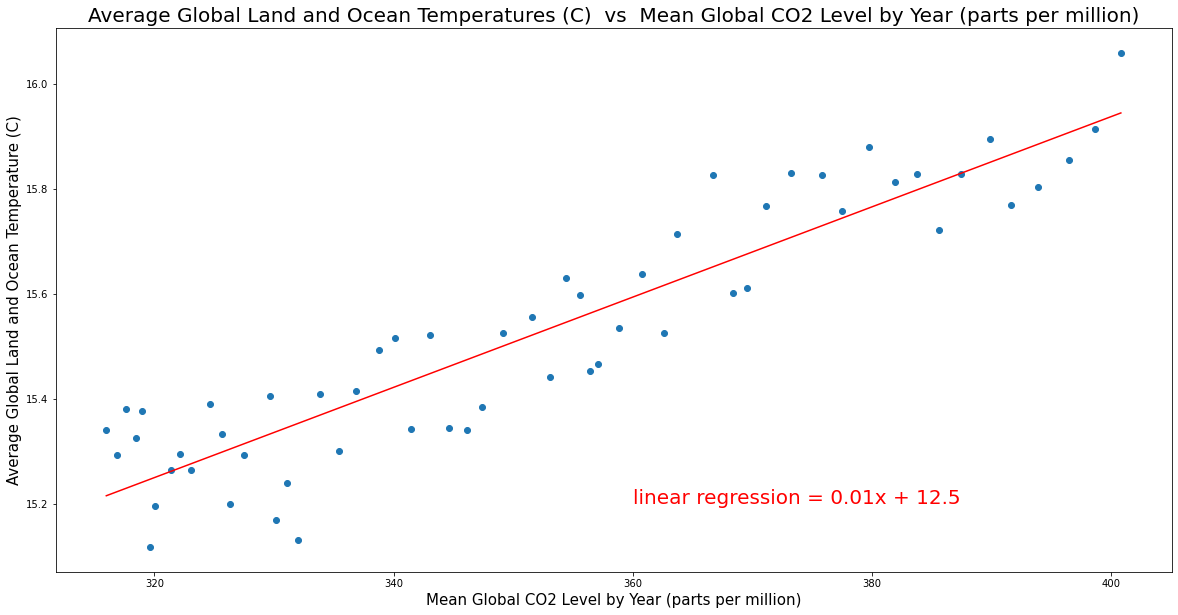

In [15]:
#creating x and y values
x_values = merged_df["yearly mean co2 emission (ppm)"]
y_values = merged_df["LandAndOceanAverageTemperature"]


#scatter plot configuration
plt.figure(figsize=(20, 10))
plt.scatter(x_values, y_values)
plt.xlabel("Mean Global CO2 Level by Year (parts per million)",fontsize=15)
plt.ylabel("Average Global Land and Ocean Temperature (C)",fontsize=15)
plt.title("Average Global Land and Ocean Temperatures (C)  vs  Mean Global CO2 Level by Year (parts per million)",fontsize=20)

#plotting line of regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
y_values_line = slope*x_values + intercept

line_eq = f"linear regression = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(360,15.2),fontsize=20,color="red")

plt.plot(x_values, y_values_line, color = "red")

plt.savefig("boxplot_scatter_gmaps_images/average_temp_co2_scatter_heesu.png")

plt.show()


In [16]:
#viewing correlation coefficients and p value
print(f"correlation coefficient {rvalue}")
print(f"p value {pvalue}")

correlation coefficient 0.9215438739943146
p value 2.9278456849622948e-24


* strong positive correlation with a very small p value. this suggest that this correlation is of statistical significance 
* as co2 levels increase, global average temperatures also increase

### Are there any temperature outliers?
* Theres is an outlier of 16.06 degrees recorded in 2015

In [17]:
#creating groupby object by year
avetemp_gb = global_temps.groupby("year")

#finding mean temperature for each of the years
max_ave_temp_series = avetemp_gb["LandAndOceanAverageTemperature"].mean()
#finding maximum mean temperature 
max_average_mean = round(avetemp_gb["LandAndOceanAverageTemperature"].mean().max(),2)


# quartile calculations for average land and ocean temperatures by year
quartiles = max_ave_temp_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print("")
print(f"The upper quartile of temperatures is: {upperq}")
print("")
print(f"The interquartile range of temperatures is: {iqr}")
print("")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print("")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print("")
print(f"Values above {upper_bound} could be outliers.")
print("")
print(f"Average mean temperature of {max_average_mean} degrees celsius is an outlier and was recorded in 2015")

The lower quartile of temperatures is: 14.991208333333331

The upper quartile of temperatures is: 15.379104166666668

The interquartile range of temperatures is: 0.3878958333333369

The the median of temperatures is: 15.144208333333335 

Values below 14.409364583333325 could be outliers.

Values above 15.960947916666672 could be outliers.

Average mean temperature of 16.06 degrees celsius is an outlier and was recorded in 2015


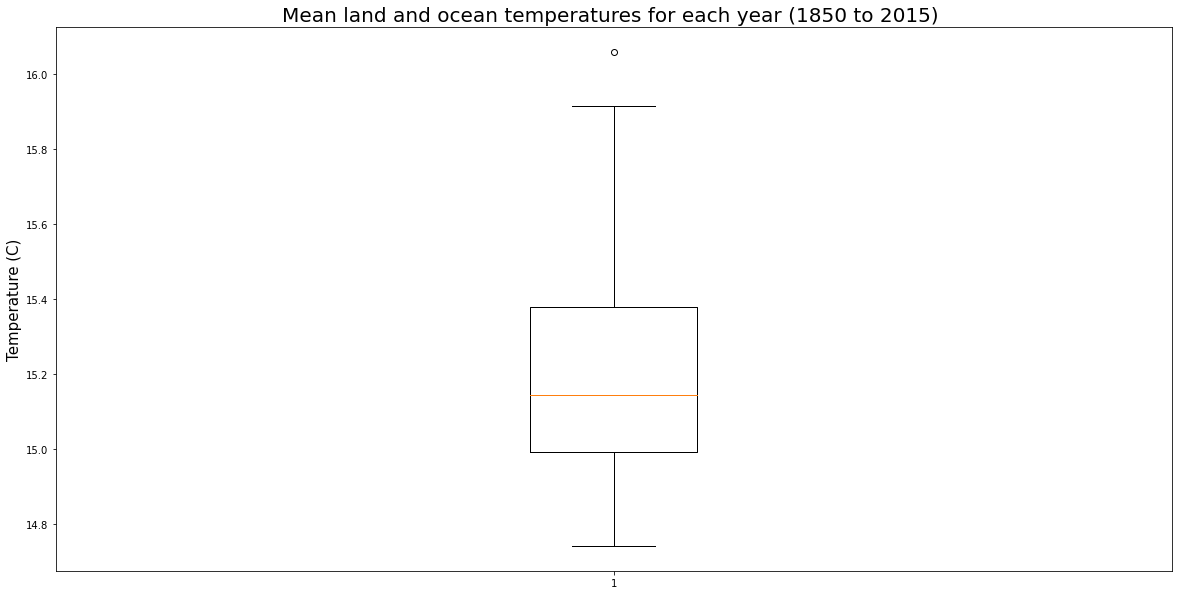

In [18]:
#turning into list
mean_ave_temp_list = list(max_ave_temp_series)

#boxplot of land and ocean mean temperatures for each year
plt.figure(figsize=(20, 10))
plt.boxplot(mean_ave_temp_list)
plt.title("Mean land and ocean temperatures for each year (1850 to 2015) ",fontsize=20)
plt.ylabel("Temperature (C)",fontsize=15)

plt.savefig("boxplot_scatter_gmaps_images/mean_temp_boxplot_heesu.png")

plt.show()

In [19]:
#finding which year the outlier temp occured
merged_df.loc[merged_df["LandAndOceanAverageTemperature"] == (merged_df["LandAndOceanAverageTemperature"].max()),:]

,year,LandAndOceanAverageTemperature,yearly mean co2 emission (ppm)
165,2015,16.058583,400.83


## Question 2 (Anne)
### Is there relationship between a Region’s average temperature and its CO2 level?



## Question 5 (Zheng)
### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?

### Findings: 
* Globally, life expectancy increases as CO2 emission per capita increase.
* The relationship between life expectancy and CO2 is exponential
* The R squared value of the proposed predicing model is about 0.59.
* This means that the relationship between CO2 and life expectancy may be not that close as we expected.

In [20]:
# Read Life Expectancy data from csv file 
lf_df = pd.read_csv("data_sets/Lifeexpectancy.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    lf_df=lf_df.drop(columns=[f"{x}"])
lf_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.429,74.576,74.725,74.872,75.017,75.158,75.299,75.441,75.583,75.725
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,58.826,59.375,59.930,60.484,61.028,61.553,62.054,62.525,62.966,63.377
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,51.143,52.177,53.243,54.311,55.350,56.330,57.236,58.054,58.776,59.398
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission_percapita.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])

# Preview CO2 emission dataframe
co2_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786


In [22]:
# Merge life expectancy and CO2 dataframes with the key "Country Name"
co2_lf_df=lf_df.merge(co2_df,how="inner",on="Country Name", suffixes=('_lf', '_co2'))
# Preview data
co2_lf_df.head()

,Country Name,Country Code_lf,Indicator Name_lf,Indicator Code_lf,1960_lf,1961_lf,1962_lf,1963_lf,1964_lf,1965_lf,...,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786


In [23]:
# Clean NAN value from merged dataframe 
co2_lf_df.dropna(inplace=True)

# Clean druplicated coutnry from merged dataframe 
co2_lf_df.drop_duplicates(subset=['Country Name'],inplace=True)

# Clean negative value
for y in range(1960,2016):
    co2_lf_df=co2_lf_df[co2_lf_df[f"{y}_co2"]>=0]
    co2_lf_df=co2_lf_df[co2_lf_df[f"{y}_lf"]>=0]

co2_lf_df.reset_index(drop=True).head()

,Country Name,Country Code_lf,Indicator Name_lf,Indicator Code_lf,1960_lf,1961_lf,1962_lf,1963_lf,1964_lf,1965_lf,...,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,4.287323,4.118447,4.408396,4.562925,4.630645,4.572407,4.956928,4.801390,4.981330,4.933420


In [24]:
# Transfer "Country Name" column to a list of country
country=co2_lf_df["Country Name"].tolist()
#print(country)

In [25]:
# Create two dictionaries of CO2 and Life expectancy.
# Keys are country names and values are list of CO2/Life expectancy data
co2_dict={}
lf_dict={}

In [26]:
# Loop every country in the country list
for x in country:
    # Add the key (coutry) to the dictionary
    co2_dict[x]=[]
    lf_dict[x]=[]
    # Loop every year from 1960 to 2015
    for y in range(1960,2016):
        # Add the value to the correponding country.
        co2_dict[x].append(co2_lf_df[f"{y}_co2"][co2_lf_df["Country Name"]==x].values[0])
        lf_dict[x].append(co2_lf_df[f"{y}_lf"][co2_lf_df["Country Name"]==x].values[0])

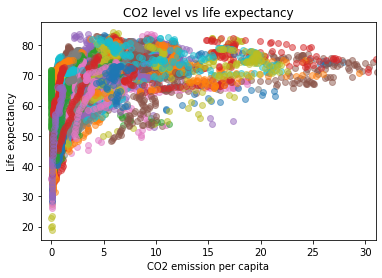

In [27]:
# Combine all the co2/life expectancy data together for curve fitting
co2=[]
lf=[]
# Loop every coutnry in the country list
for x in country:
    for y in co2_dict[x]:
        co2.append(y)
    for y in lf_dict[x]:
        lf.append(y)
    # Plot the CO2/Life expectancy data of each country
    plt.scatter(co2_dict[x], lf_dict[x], alpha=0.5)

#plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')

# Set up the figure
plt.xlim(-1,31)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\Global_CO2_vs_LifeExpectancy.png")
plt.show()

* Globally, life expectancy increases as CO2 emission per capita increase.
* The relationship between life expectancy and CO2 is exponential

0.003079225


C:\Users\Heesu Ha\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


The r squared value is 0.592


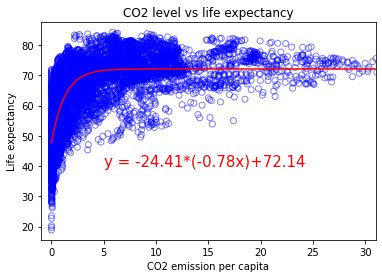

In [28]:
# Define the function we will use for curve fitting.
def func(x, a, b, c):
    return a * np.exp(-b *x) + c

print(min(co2))
# Curve fitting the data
popt, pcov = curve_fit(func, co2, lf)
x_values= np.arange(0.0, 50.0, 0.1)
y_values = [func(x, *popt) for x in x_values]

line_eq = "y = " + str(round(popt[0],2)) + "*(" + str(round(-popt[1],2))+"x)+"+str(round(popt[2],2))
#print(min(co2))
residuals=[]
for i in range(len(co2)):
    residuals.append(lf[i]- func(co2[i], popt[0],popt[1],popt[2]))
ss_res=0.0
for i in range(len(co2)):
    ss_res += residuals[i]**2
    ss_tot = np.sum((lf-np.mean(lf))**2)
r_squared = 1 - (ss_res / ss_tot)
#perr = np.sqrt(np.diag(pcov))
print(f"The r squared value is {round(r_squared, 3)}")

plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')
plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlim(-1,31)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")

plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\Curve_fitting_Global_CO2_vs_LifeExpectancy.png")
plt.show()

* The R squared value of the proposed predicing model is about 0.59.
* This means that the relationship between CO2 and life expectancy may be not that close as we expected.

### Is there a correlation between average CO2 emission vs average Life expectancy?
* The average values of CO2/life expectancy show that no obvious correlation is found.
* The relationship between CO2 and life expectancy should be examined regionally.

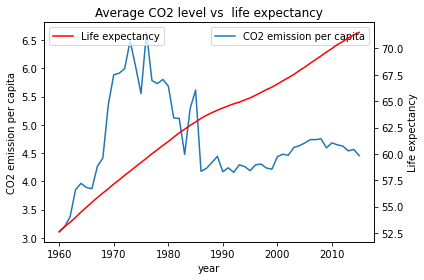

In [29]:
co2_lf_sum=co2_lf_df.describe()
co2_mean=[]
lf_mean=[]
# Create year list
year=[x for x in range(1960,2016)]
for y in year:
    co2_mean.append(co2_lf_sum.iloc[1][f"{y}_co2"])
    lf_mean.append(co2_lf_sum.iloc[1][f"{y}_lf"])

fig, ax1 = plt.subplots()

# Plot average CO2 emission
ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
ax1.plot(year,co2_mean,label="CO2 emission per capita")
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="best")

# Plot average life expectancy
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
ax2.plot(year, lf_mean,color="r",label="Life expectancy")
ax2.tick_params(axis='y')

ax2.legend(loc="best")
plt.title("Average CO2 level vs  life expectancy")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\Global_CO2_vs_LifeExpectancy_average_value.png")
plt.show()

* The average values of CO2/life expectancy show that no obvious correlation is found.
* The relationship between CO2 and life expectancy should be examined regionally.

### Is there an effect of CO2 emission on Life expectancy in different countries?
* Developed countries: The CO2 emissions in developed countries are higher. CO2 emission change has little effect on life expectancy.
* Developing countries: The CO2 emissions in developing countries are lower. Life expectancy increases as CO2 emission increases in developing countries.

### Developed countries

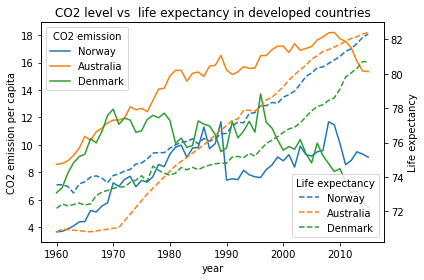

In [30]:
# Developed countries list
Developed_Country=["Norway","Australia","Denmark"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
# plot co2 emission in developed countries
for x in Developed_Country:
    ax1.plot(year,co2_dict[x])
ax1.tick_params(axis='y')
ax1.legend(Developed_Country,title='CO2 emission',loc='upper left')

# plot life expectancy in developed countries
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developed_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed')
ax2.tick_params(axis='y')
ax2.legend(Developed_Country, title='Life expectancy',loc="lower right")

plt.title("CO2 level vs  life expectancy in developed countries")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\CO2_vs_LifeExpectancy_developed_countries.png")
plt.show()

* The CO2 emissions in developed coutries are higher.
* CO2 emission change has little effect on life expectancy.

### Developing countries

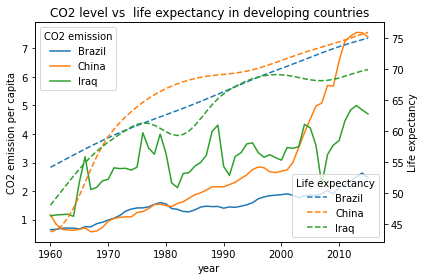

In [31]:
Developing_Country=["Brazil","China","Iraq"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
# plot co2 emission in developing countries
for x in Developing_Country:
    ax1.plot(year,co2_dict[x])
    
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(Developing_Country,title='CO2 emission',loc='upper left')

# plot life expectancy in developing countries
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developing_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed',)
ax2.tick_params(axis='y')
ax2.legend(Developing_Country, title='Life expectancy',loc="lower right")

plt.title("CO2 level vs  life expectancy in developing countries")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("CO2_vs_LifeExpectancy_Zheng_Qi\CO2_vs_LifeExpectancy_developing_countries.png")
plt.show()

* The CO2 emissions in developing coutries are lower.
* Life expectancy increases as CO2 emission increases in developing countries.